In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import math 
import json

In [2]:
import pandas as pd

data = []

with open("yelp_academic_dataset_review.json", 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

yelp_df = pd.DataFrame(data)

In [52]:
yelp_df[["stars","text", "date"]].head()

,stars,text,date
0,3.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,5.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,3.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,5.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,4.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [59]:
print(f"Total Rows: {len(yelp_df)}")

Total Rows: 6990280


In [50]:
# check if there is any missing values
missing_yelp_values = yelp_df[["stars","text"]].isna()
print(f"Stars column has: {sum(missing_yelp_values['stars'])} missing values\n\
Text column has: {sum(missing_yelp_values['text'])} missing values")

Stars column has: 0 missing values
Text column has: 0 missing values


In [32]:
# Look for oldest recorded date
yelp_df["date"].min()

'2005-02-16 03:23:22'

In [33]:
# Look for most recent date
yelp_df["date"].max()

'2022-01-19 19:48:45'

In [4]:
yelp_df.dtypes

review_id       object
user_id         object
business_id     object
stars          float64
useful           int64
funny            int64
cool             int64
text            object
date            object
dtype: object

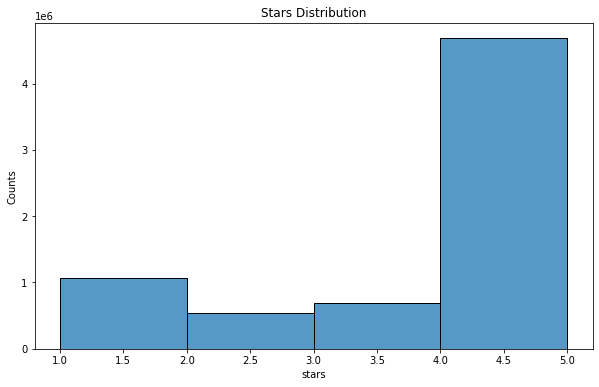

In [58]:
# look at distribution of stars rating 
plt.figure(figsize=(10, 6))
sns.histplot(x = "stars", data = yelp_df, binwidth = 1)

plt.title("Star Ratings Distribution")
plt.xlabel("stars")
plt.ylabel("Frequency")
plt.show()

In [17]:
# Check min and max length of text
print(f"Max length of a review: {yelp_df['text'].str.len().max()}\n\
Min length of a review: {yelp_df['text'].str.len().min()}")

Max length of a review: 5000
Min length of a review: 1


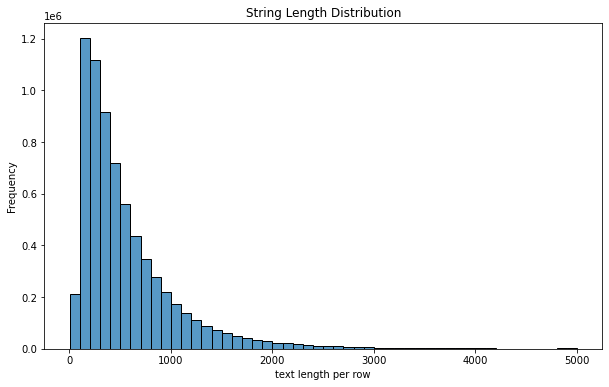

In [53]:
# Plot distribution of text length for reviews
plt.figure(figsize=(10, 6))
sns.histplot(yelp_df["text"].str.len(), binwidth = 100)

plt.title("String Length Distribution")
plt.xlabel("text length per row")
plt.ylabel("Frequency")
plt.show()